# Chapter 6: Decision Trees


Decision trees are pretty naive cuts of the coordinate axes to determine categories. They can also be used to predict values (regression) by looking at the average value of a class.



In [55]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np



In [ ]:
iris = load_iris()


In [2]:
X = iris.data[:, 2:] # Petal length and width
y = iris.target

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [4]:
from sklearn.tree import export_graphviz
export_graphviz(tree, 
                out_file="iris_tree.dot",
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded = True,
                filled = True,
               )

# Testing out Decision trees

Let's create another moons dataset and see how well decision trees work on it. This is not in the book.



In [5]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Create a random dataset with "moons" that you have to separate
X, y = make_moons(n_samples=1000, noise=0.15)


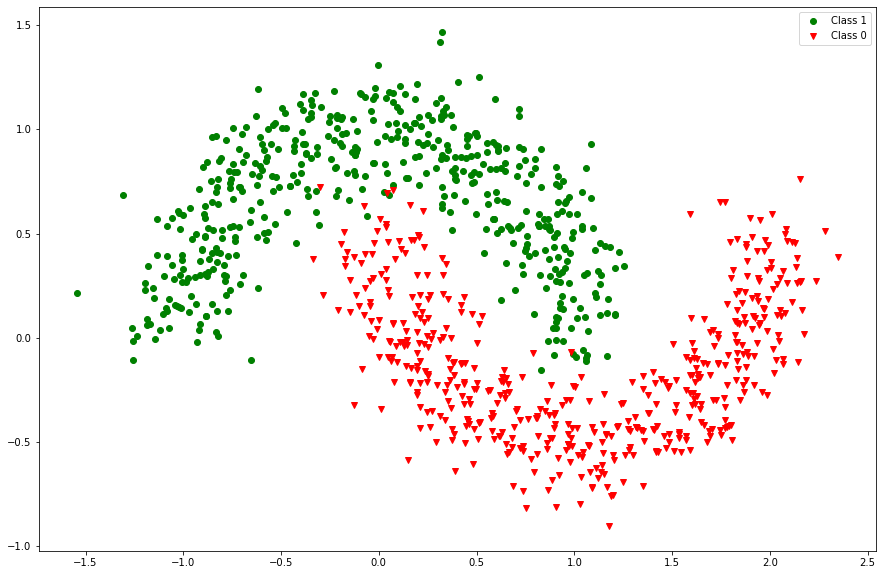

In [6]:
import matplotlib.pyplot as plt

index_c0 = (y == 0)
index_c1 = (y == 1)

plt.figure(figsize=(15, 10))

plt.plot(X[index_c0][:,0], X[index_c0][:,1], 'go', label='Class 1')
plt.plot(X[index_c1][:,0], X[index_c1][:,1], 'rv', label='Class 0')
plt.legend()



In [7]:
# Train a classifier
tree_moons_4 = DecisionTreeClassifier(max_depth=4)
tree_moons_4.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

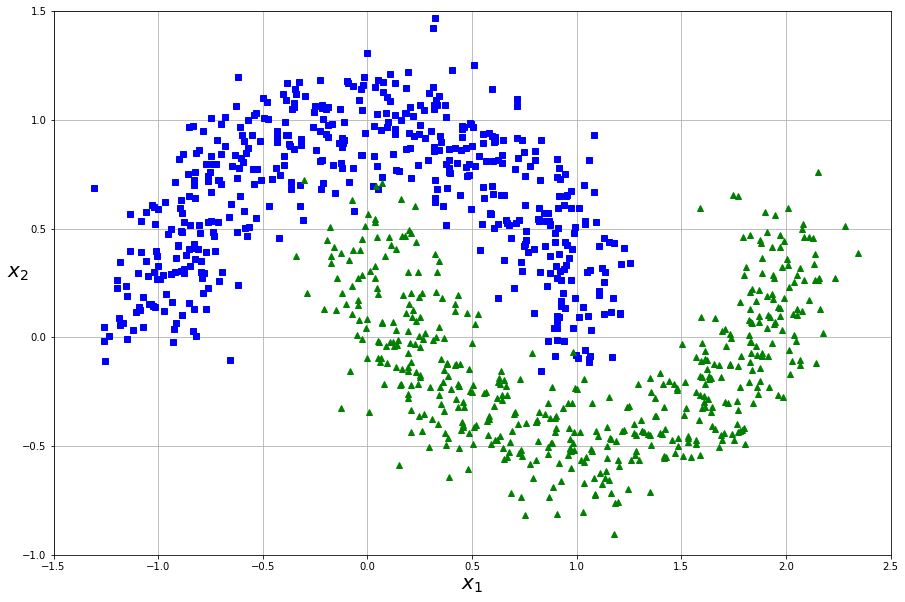

In [8]:
def plot_dataset(X, y, axes):
    "Plot the Moons dataset with two classes: 0 and 1"
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

# Plot the data
plt.figure(figsize=(15, 10))
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()




In [69]:
y_train.shape

(800, 1)

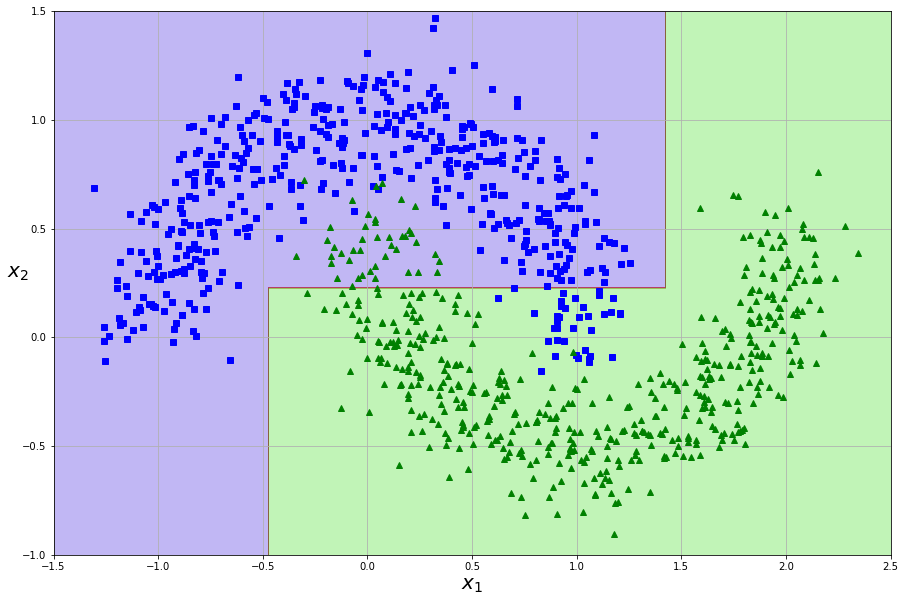

In [11]:
import numpy as np

def plot_predictions(clf, axes):
    "Visualize what the classifier will choose on this dataset"
    x0s = np.linspace(axes[0], axes[1], 1000)
    x1s = np.linspace(axes[2], axes[3], 1000)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

# Plot the predictions and the classifier
plt.figure(figsize=(15, 10))
plot_predictions(tree_moons_4, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

Outstanding. That was too shallow, even though the depth was 4. Let's print the decision tree itself to see what it looks like.

In [18]:
export_graphviz(tree_moons_4, 
                out_file="tree_moons_4.dot",
                feature_names=['X1', 'X2'],
                class_names=["BlueSquare", 'GreenTriangle'],
                rounded = True,
                filled = True,
               )

In [14]:
tree_moons_8 = DecisionTreeClassifier(max_depth=8)
tree_moons_8.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

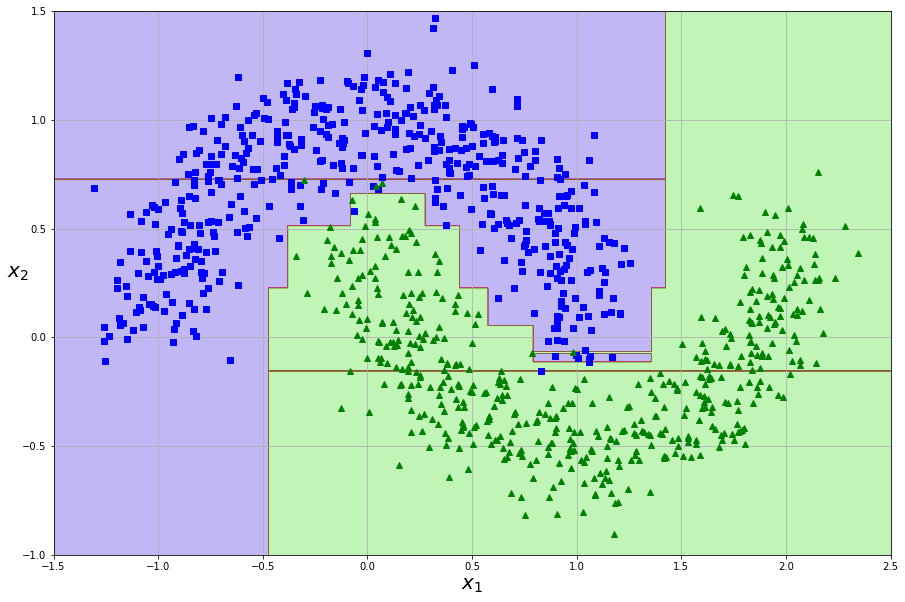

In [15]:
# Plot the predictions and the classifier
plt.figure(figsize=(15, 10))
plot_predictions(tree_moons_8, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [16]:
DecisionTreeClassifier?

The previous classifier was clearly over-fitting, so let's add a regularization parameter
(min_samples_leaf=4) to avoid breaking into too small a node.

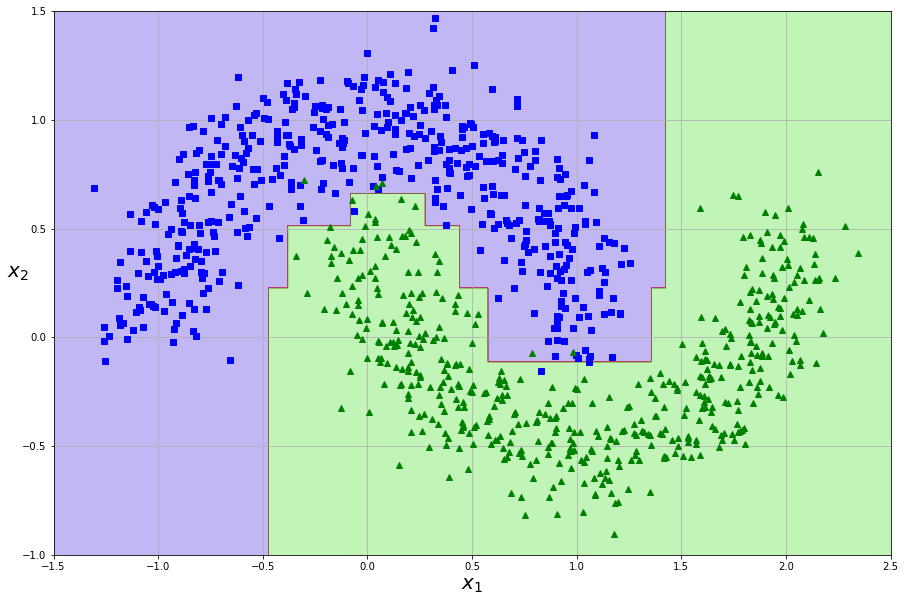

In [17]:
moons_sl4 = DecisionTreeClassifier(min_samples_leaf=4)
moons_sl4.fit(X, y)

# Plot the predictions and the classifier
plt.figure(figsize=(15, 10))
plot_predictions(moons_sl4, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [19]:
export_graphviz(moons_sl4, 
                out_file="moons_sl4.dot",
                feature_names=['X1', 'X2'],
                class_names=["BlueSquare", 'GreenTriangle'],
                rounded = True,
                filled = True,
               )

In [20]:
1-(1/100)**2 - (99/100)**2

0.01980000000000004

# Exercises

1. Depth of decision tree without restrictions on a million tree, is roughly $log_2(x)$.

2. Node's Gini impurity could be higher than it's parents. For example, if a node has two classes: (99, 1). Gini impurity is $1 - (\frac{1}{100})^2 - (\frac{99}{100})^2 = 0.019 $. If it's child has one pure node (98, 0), and the second node has (1, 1), then the node with (1,1) has Gini impurity 0.5.

3. Yes, for overfitting training sets, good idea to decrease max_depth.

4. Not a good idea to scale input features. Decision trees are independent of scale.

5. $O(n \times m ~ \log(m)) = 1^6$, so 
   $$O(n \times 10 m ~ \log(10 m)) $$
$$= O(n \times 10 m \times (\log(10) + \log(m))) $$
$$= 10 O(n \times m \times \log(10)) + 10 O(n \times m ~ \log(m))$$
$$= 10 O(n \times m \times 2.3 ) + 10 \times 1^6$$
$$= k + 10 \times 1^6$$

   So a little more than 10 hours.
   
   Even better:
   $$O(n m \log(m)) = 1$$
   So, 
   $$ n m \log(m)) = 1 \times k$$
   $$ m \log(m) = 1 \times k/n$$
   $$ 10^6 \log(10^6) = k/n$$
   $$ 13815510.56 = k/n$$
   
   Now, $10m$ instances take:
   $$ 10m \log(10m) = t \times (k/n) $$
   $$ 161180956.51 = t \times (k/n)$$
   
   Substituting: 
   $$ 13815510.56 = k/n$$

   $$ \frac{161180956.51}{13815510.58} = t$$
   t = 11.67 hours, roughly.
   
6. It will speed up training, but the sorting will probably take longer overall.
   
   
7. Creating a moons set and using cross validation to find a decision tree.

In [80]:
# Create a random dataset with "moons" that you have to separate
X7, y7 = make_moons(n_samples=10000, noise=0.4)


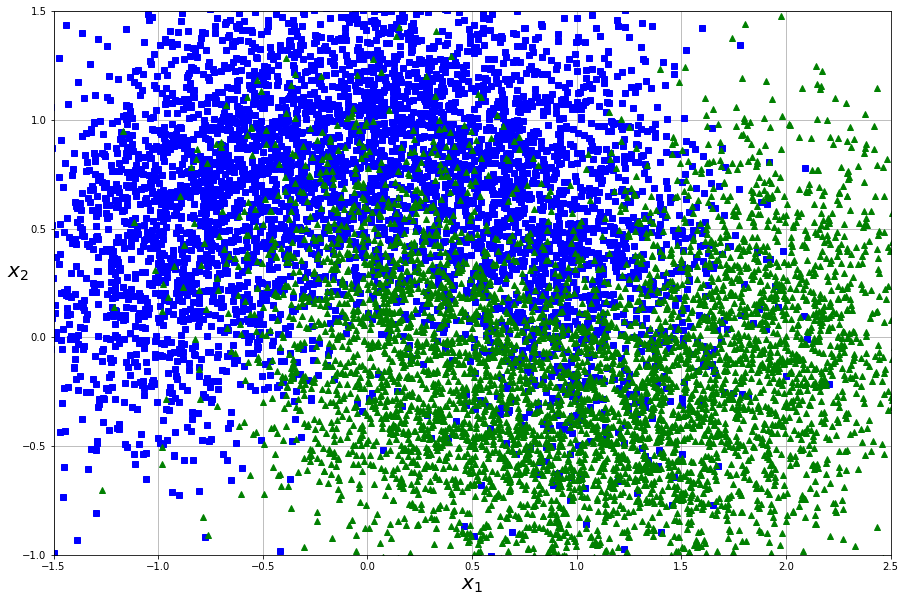

In [81]:

# Plot the data
plt.figure(figsize=(15, 10))
plot_dataset(X7, y7, [-1.5, 2.5, -1, 1.5])
plt.show()

Wow, that is bad. It is going to be difficult to separate those cleanly.

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [84]:
# This is the first step, split into training and test data.

# The semantics of np.c_ are tricky, and it is not a method call, but an array reference
# instead.
train, test = train_test_split(np.c_[X7, y7], test_size=0.2, random_state=42)

In [91]:
# The attributes are the first two columns, and the class was the third column
X_train = train[:, :2]
y_train = train[:, 2]

X_test = test[:, :2]
y_test = test[:, 2]

In [87]:
y_train.shape

(8000,)

In [88]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_leaf_nodes': [None, 2, 4, 6, 8, 10, 50], 'min_samples_leaf': [1, 2, 4, 8, 10, 50]},
]

# We want to search for best parameters for a Random Forest regressor
tree_classifier = DecisionTreeClassifier()
grid_search = GridSearchCV(tree_classifier, param_grid, cv=10,
                          return_train_score=True)

# Now train the model with all the choices
grid_search.fit(X_train, y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_leaf_nodes': [None, 2, 4, 6, 8, 10, 50],
     

In [89]:
selected_estimator = grid_search.best_estimator_

grid_search.best_params_

{'max_leaf_nodes': None, 'min_samples_leaf': 50}

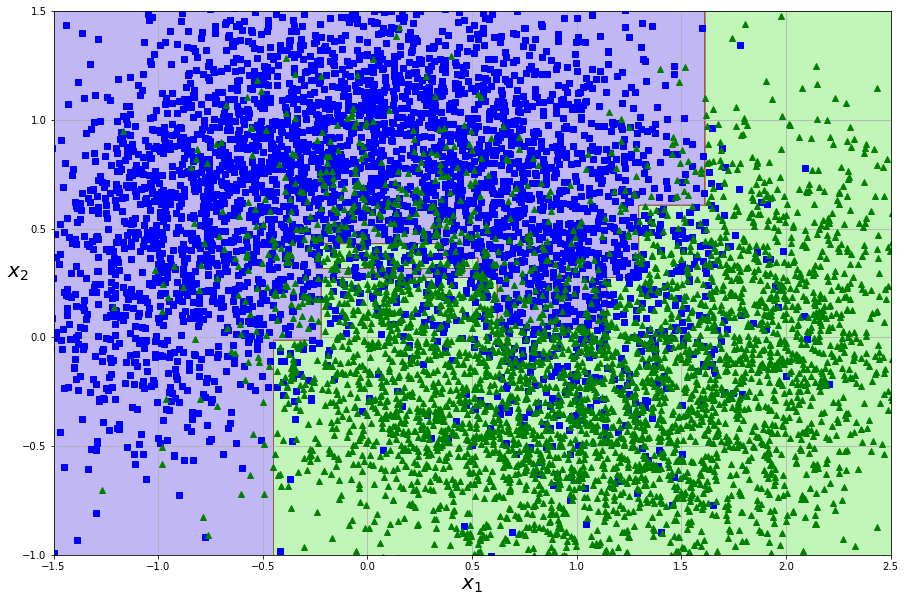

In [90]:
# Plot the predictions and the classifier
plt.figure(figsize=(15, 10))
plot_predictions(selected_estimator, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_train, y_train, [-1.5, 2.5, -1, 1.5])
plt.show()

Let's calculate performance on the test set.

In [92]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score


# The area under the curve is very useful to evaluate this graph. Larger is better. 1 is the best-possible
roc_auc_score(selected_estimator.predict(X_train), y_train)

0.8686371264889611

In [93]:
roc_auc_score(selected_estimator.predict(X_test), y_test)

0.8596394221369782

In [96]:
from sklearn.metrics import accuracy_score

print ("Test accuracy", accuracy_score(y_test, selected_estimator.predict(X_test)))
print ("Training accuracy", accuracy_score(y_train, selected_estimator.predict(X_train)))

Test accuracy 0.8585
Training accuracy 0.868625


The goal was to get better than 85% accuracy, and the Area Under the Curve for the Receiver Operating curve is 0.86, which is pretty solid.

# Appendix and rough work below

In [57]:
GridSearchCV?

In [25]:
1e7*np.log(1e7)

161180956.5095832

In [47]:
train.shape

(800, 3)

In [97]:
accuracy_score?

In [35]:
A.shape


AttributeError: 'list' object has no attribute 'shape'

In [36]:
X7[0:10]

array([[ 2.90809806,  0.65454441],
       [ 0.55065747,  1.30156999],
       [ 0.6356685 , -0.71238122],
       [ 1.25359754, -0.86155491],
       [-0.52400262,  0.75779211],
       [-0.13972413,  0.66255394],
       [-0.23199156,  0.84145527],
       [-0.72911363, -0.10524581],
       [ 0.68445697, -0.09552981],
       [ 0.17553705,  0.51106392]])

In [37]:
p=X7[0:10]

In [38]:
q = y[0:10]

In [39]:
q


array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0])

In [40]:
p


array([[ 2.90809806,  0.65454441],
       [ 0.55065747,  1.30156999],
       [ 0.6356685 , -0.71238122],
       [ 1.25359754, -0.86155491],
       [-0.52400262,  0.75779211],
       [-0.13972413,  0.66255394],
       [-0.23199156,  0.84145527],
       [-0.72911363, -0.10524581],
       [ 0.68445697, -0.09552981],
       [ 0.17553705,  0.51106392]])

In [41]:
c_(p,q)

NameError: name 'c_' is not defined

In [42]:
np.c_(p,q)

TypeError: 'CClass' object is not callable

In [43]:
np.c_?


In [45]:
np.c_[p, q].shape

(10, 3)

In [1]:
from sklearn.ensemble import RandomForestClassifier

p = RandomForestClassifier()


In [2]:
p?